In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	6
float64		column 2	18
float64		column 3	0
float64		column 4	6
float64		column 5	4
float64		column 6	2
float64		column 7	6
float64		column 8	4
float64		column 9	6
float64		column 10	4
float64		column 11	4
float64		column 12	12


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,794.000000,782.000000,800.000000,794.000000,796.000000,798.000000,794.000000,796.000000,794.000000,796.000000,796.000000,788.000000
mean,1.503966,1.300236,1.981231,1.939194,1.988454,2.002983,1.954860,1.993773,1.993940,1.981116,1.955509,1.958883
std,2.749157,3.620187,1.146890,1.164095,1.170080,1.142725,1.168193,1.134609,1.144707,1.155589,1.182461,1.126002
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.421162,-0.602950,1.020375,0.929173,0.976290,0.987023,0.949410,0.978542,1.056375,1.003828,0.891135,0.969322
50%,0.888675,1.220600,1.968150,1.906800,2.021450,2.006650,1.948000,2.003100,1.980000,1.992000,1.926950,1.943250
75%,3.974250,4.512000,2.925475,2.942525,2.999200,3.011400,2.964150,2.924275,3.002575,2.974450,3.028400,2.871625
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

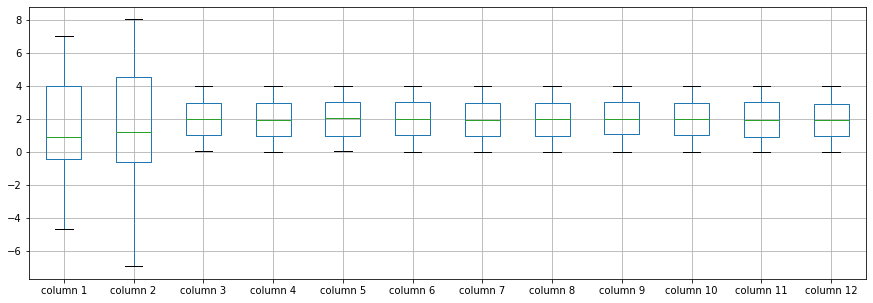

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.503966
column 2     1.300236
column 3     1.981231
column 4     1.939194
column 5     1.988454
column 6     2.002983
column 7     1.954860
column 8     1.993773
column 9     1.993940
column 10    1.981116
column 11    1.955509
column 12    1.958883
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.418821,-0.025675,0.002299,0.037450,0.053078,-0.001084,0.024233,-0.008832,-0.001617,0.031712,0.027050
column 2,-0.418821,1.000000,-0.022625,-0.027120,-0.021423,-0.005561,0.031571,-0.008165,0.000835,-0.027179,-0.084842,0.027906
column 3,-0.025675,-0.022625,1.000000,-0.038849,0.075633,0.002407,0.025579,-0.006503,-0.001593,-0.007046,-0.030789,0.011286
column 4,0.002299,-0.027120,-0.038849,1.000000,-0.006091,-0.030580,0.031645,0.043610,-0.032083,0.046010,0.044441,-0.016133
column 5,0.037450,-0.021423,0.075633,-0.006091,1.000000,0.057394,0.018213,0.005454,-0.014283,-0.015207,-0.004927,0.010834
column 6,0.053078,-0.005561,0.002407,-0.030580,0.057394,1.000000,-0.081039,0.040514,0.022364,0.014547,-0.037033,0.005484
column 7,-0.001084,0.031571,0.025579,0.031645,0.018213,-0.081039,1.000000,-0.040995,-0.011652,-0.041740,-0.012773,-0.006470
column 8,0.024233,-0.008165,-0.006503,0.043610,0.005454,0.040514,-0.040995,1.000000,-0.068528,-0.047395,0.002713,-0.037497
column 9,-0.008832,0.000835,-0.001593,-0.032083,-0.014283,0.022364,-0.011652,-0.068528,1.000000,0.041183,-0.013924,-0.017832
column 10,-0.001617,-0.027179,-0.007046,0.046010,-0.015207,0.014547,-0.041740,-0.047395,0.041183,1.000000,-0.075022,0.045636


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+85,12+85+85,12+85+85,12+85+85+85+85,12+85+85+85,12+85+85,12+85,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.29621467590332
Epoch: 1 , loss: 28.848012619018554
Epoch: 2 , loss: 26.159827575683593
Epoch: 3 , loss: 23.957657356262207
Epoch: 4 , loss: 23.100513687133787
Epoch: 5 , loss: 22.699103393554687
Epoch: 6 , loss: 22.18715072631836
Epoch: 7 , loss: 21.90346462249756
Epoch: 8 , loss: 21.47698341369629
Epoch: 9 , loss: 21.08552318572998
Epoch: 10 , loss: 20.903739051818846
Epoch: 11 , loss: 20.865899276733398
Epoch: 12 , loss: 20.628817100524902
Epoch: 13 , loss: 20.603588256835938
Epoch: 14 , loss: 20.267338218688966
Epoch: 15 , loss: 20.090943756103517
Epoch: 16 , loss: 20.11795597076416
Epoch: 17 , loss: 20.053102951049805
Epoch: 18 , loss: 19.894365196228026
Epoch: 19 , loss: 19.86696964263916
Epoch: 20 , loss: 19.776715202331545
Epoch: 21 , loss: 19.680892219543455
Epoch: 22 , loss: 19.70573787689209
Epoch: 23 , loss: 19.75807689666748
Epoch: 24 , loss: 19.67041145324707
Epoch: 25 , loss: 19.658189

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(22.007755385490267, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.08866157977240927

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_AN_1(imp).xlsx", index=False, header=False)